In [1]:
# Import programs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

### PreData Transformation
Original Data had over 500K line of data and we merged people related to the car crashes using Knime which was easier to see if the transformation or join was correct. Any missing data was fixed in Knime (ETL program) We also reduced the file to about 250K lines so it was more managable.
The file below is that combined vie

In [2]:
df = pd.read_csv('Traffic_People_v2.csv')
df[1:5]
pd.DataFrame(df)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE
0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,FREEZING RAIN/DRIZZLE,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,none,none,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938
3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,none,none,OTHER,UNKNOWN,IMPAIRED - DRUGS,none,none,none,TEST NOT OFFERED,0.179938
4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ALLEY,...,none,none,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,none,none,none,none,none,none,none,none,none,0.179938
248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,none,none,none,none,none,none,none,none,none,0.179938
248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,REFUSED,none,none,none,none,none,none,none,none,0.179938
248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,ALLEY,...,REFUSED,none,none,none,none,none,none,none,none,0.179938


### Data Size
248623 rows and 68 columns

In [3]:
df.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,VEHICLE_ID,AGE,BAC_RESULT VALUE
count,248623.000000,248623.00000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.0,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,2.486230e+05,248623.000000,248623.000000
mean,28.923559,3786.41505,1223.580626,2.094118,0.243658,0.001597,0.024065,0.140438,0.077559,2.183491,0.0,13.440856,4.147046,5.858899,41.850617,-87.676220,1.121074e+06,39.270758,0.179938
std,5.322281,2862.65533,697.324309,0.493873,0.651729,0.043218,0.185780,0.493453,0.363912,1.280209,0.0,5.482035,1.990205,3.407678,0.252729,0.500941,9.347873e+04,13.467616,0.004066
min,0.000000,1.00000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193,9.647270e+05,0.000000,0.000000
25%,30.000000,1357.00000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,10.000000,2.000000,3.000000,41.778003,-87.722602,1.044070e+06,30.000000,0.179938
50%,30.000000,3314.00000,1123.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,6.000000,41.867270,-87.674871,1.121074e+06,39.270758,0.179938
75%,30.000000,5700.00000,1772.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,17.000000,6.000000,9.000000,41.920674,-87.633046,1.191926e+06,44.000000,0.179938
max,70.000000,13799.00000,2535.000000,14.000000,21.000000,3.000000,6.000000,19.000000,8.000000,45.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000,1.595068e+06,103.000000,1.000000


In [133]:
df1.isnull().any()

POSTED_SPEED_LIMIT               False
INJURIES_TOTAL                   False
INJURIES_FATAL                   False
INJURIES_INCAPACITATING          False
INJURIES_NON_INCAPACITATING      False
INJURIES_REPORTED_NOT_EVIDENT    False
INJURIES_NO_INDICATION           False
INJURIES_UNKNOWN                 False
AGE                              False
BAC_RESULT VALUE                 False
dtype: bool

In [134]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'PERSON_ID', 'PERSON_TYPE',
       'CRASH_RECORD_ID (right)', 'RD_NO (right)', 'VEHICLE_ID',
       'CRASH_DATE (right)

### Change name of file
Changing name of file because we'll need df later to merge cluster assignments

In [135]:
# preerve df
dff=df

### EDA
We create a pie chart views for categorical and a table for numerical attribute

In [136]:
# Create cat which is list of all categorical columns we want to examine
cat=('TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE','PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 
       'STREET_DIRECTION',  'MOST_SEVERE_INJURY', 'PERSON_TYPE',
       'SEX', 'SAFETY_EQUIPMENT','AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION')

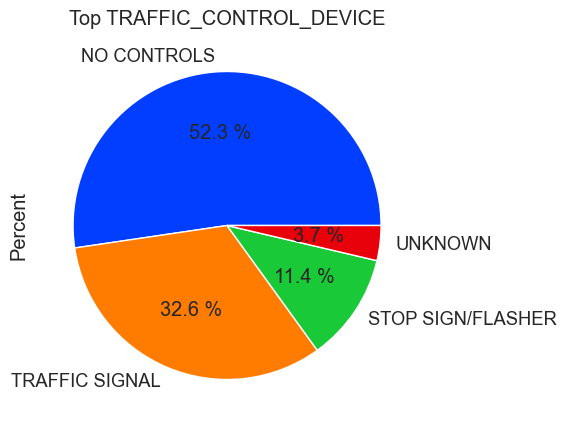

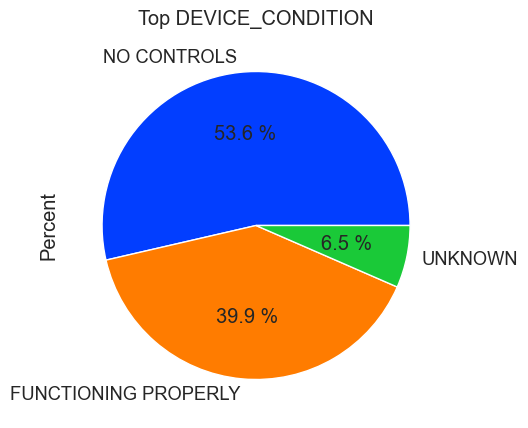

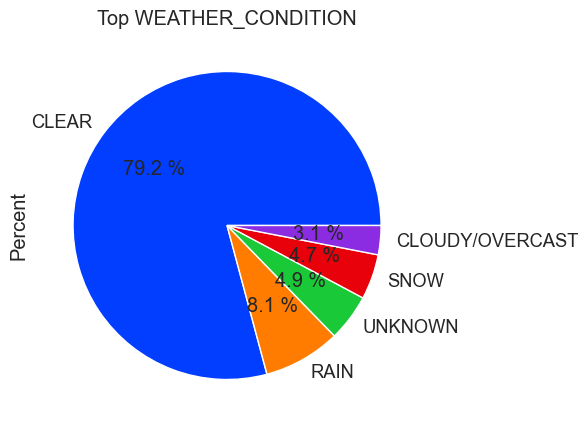

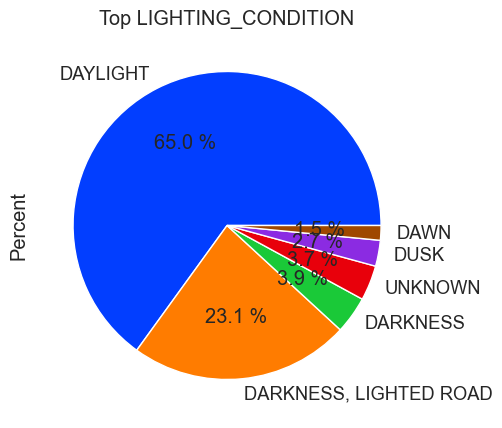

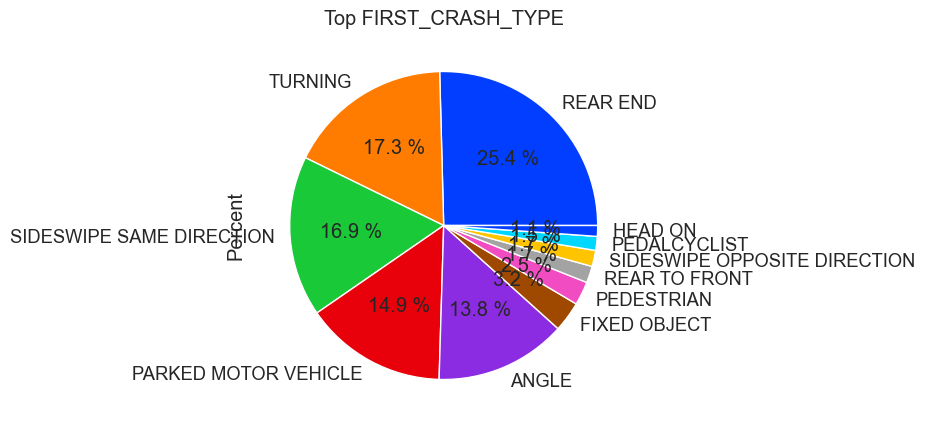

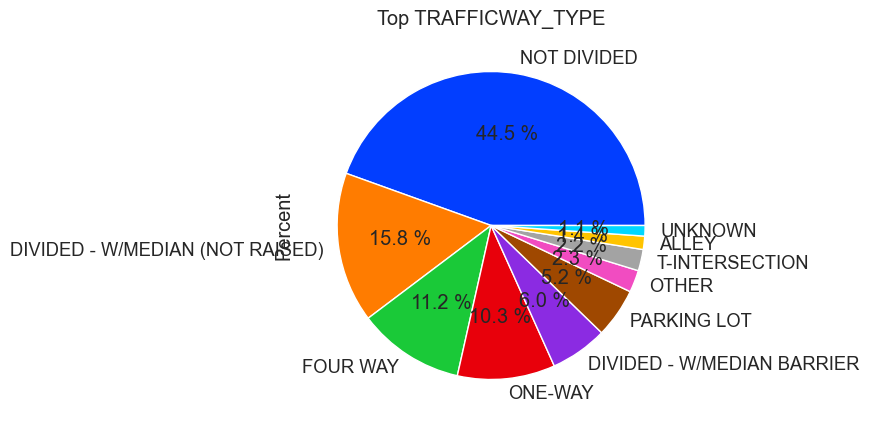

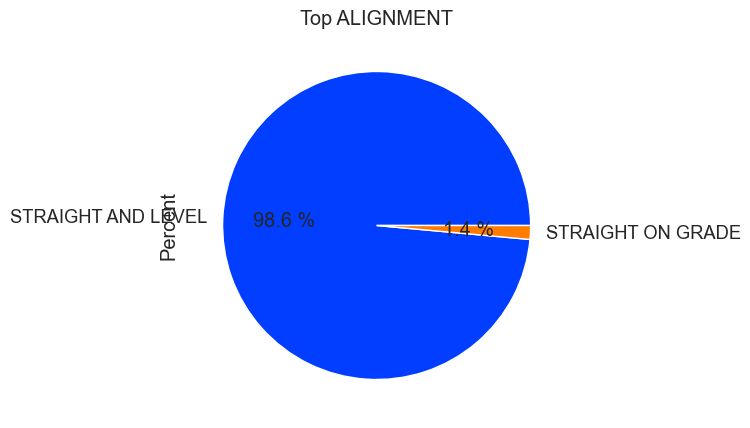

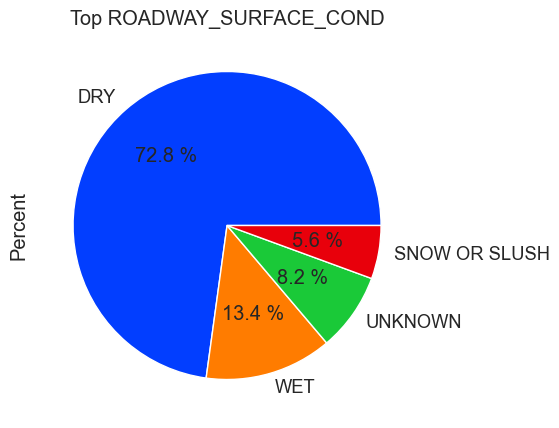

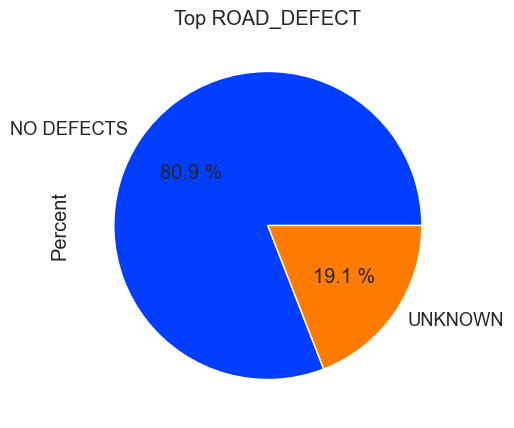

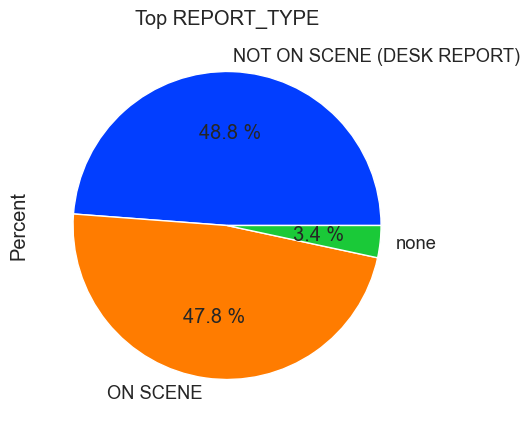

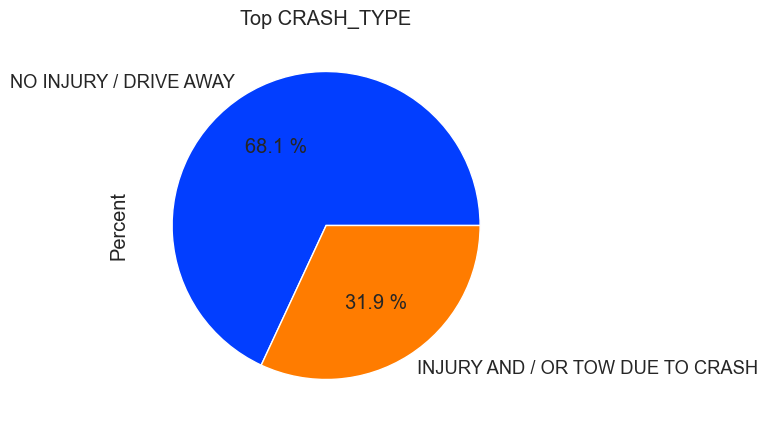

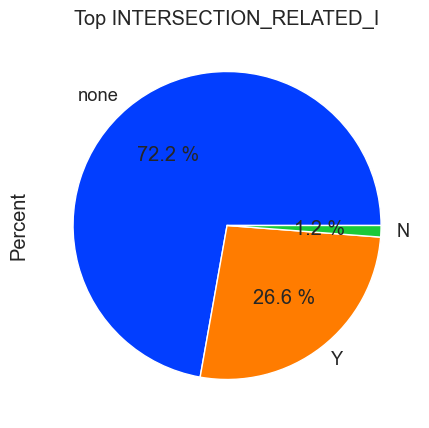

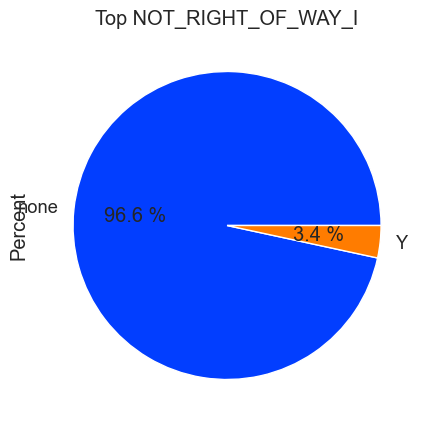

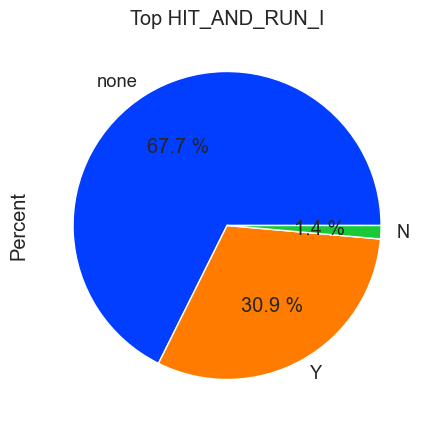

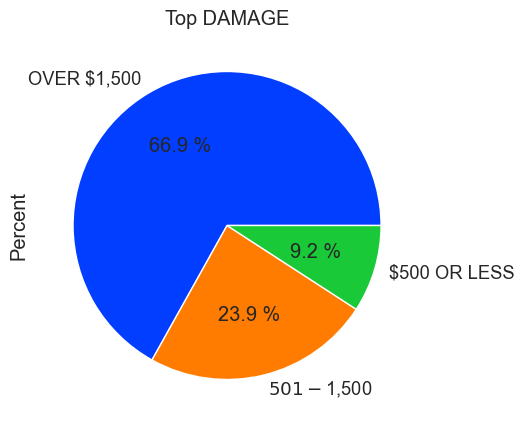

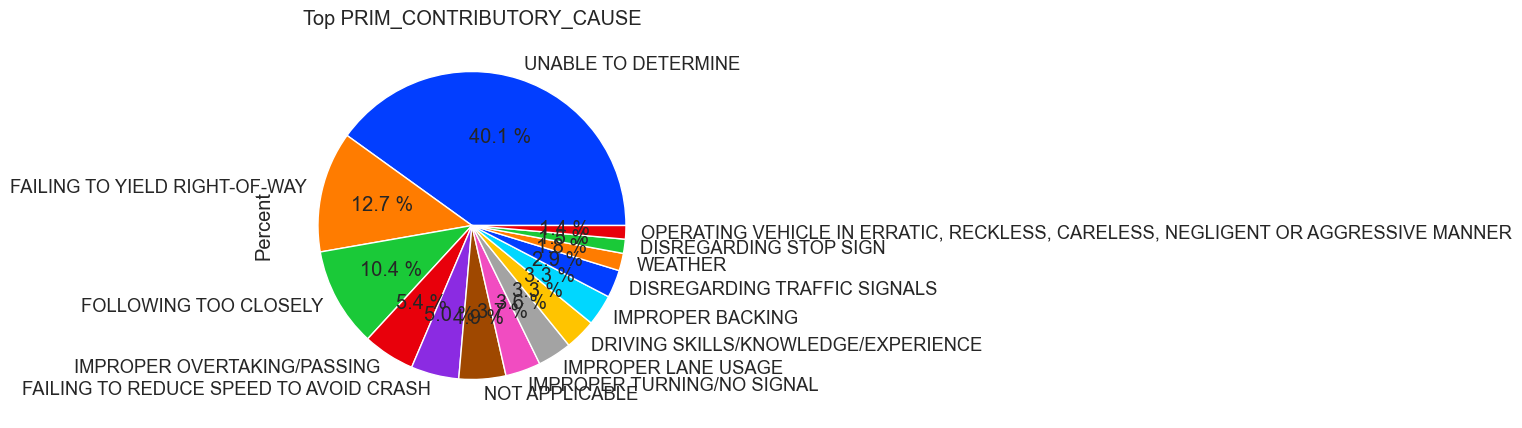

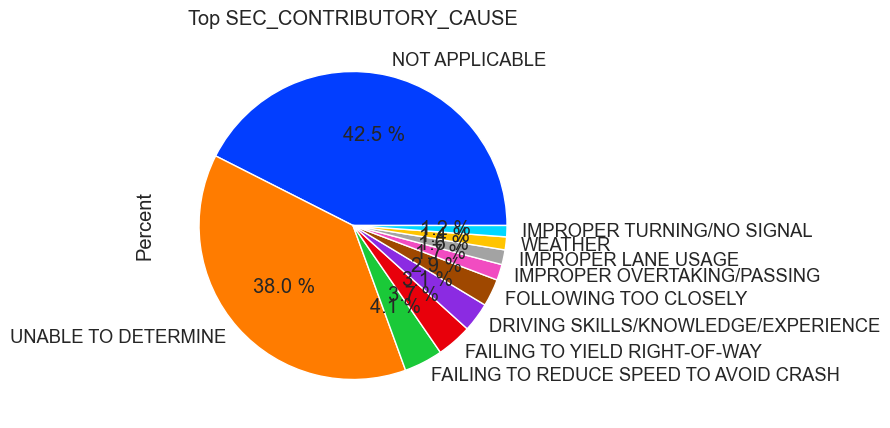

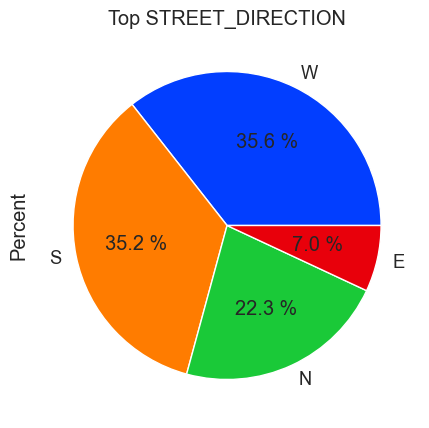

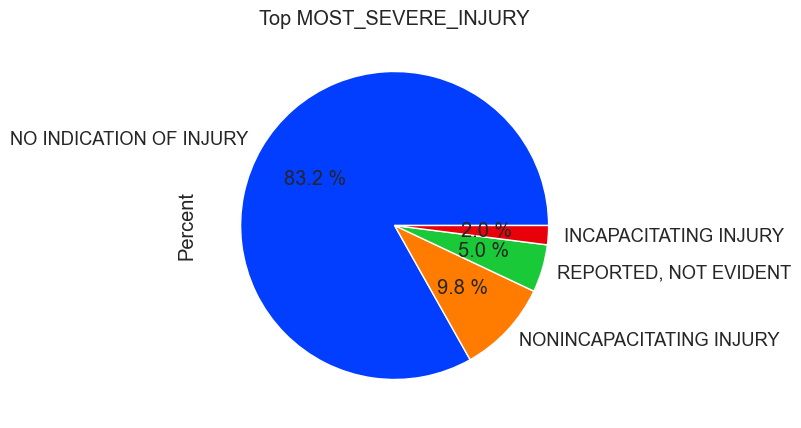

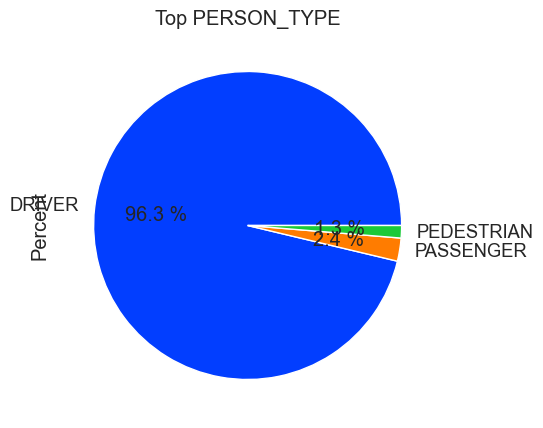

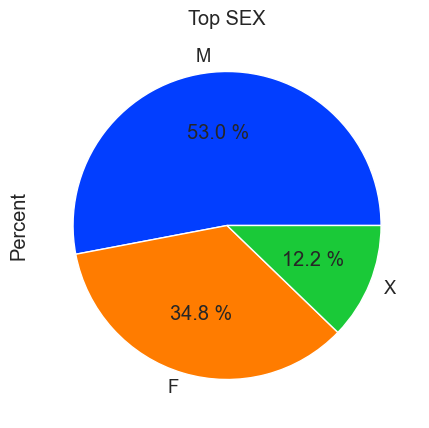

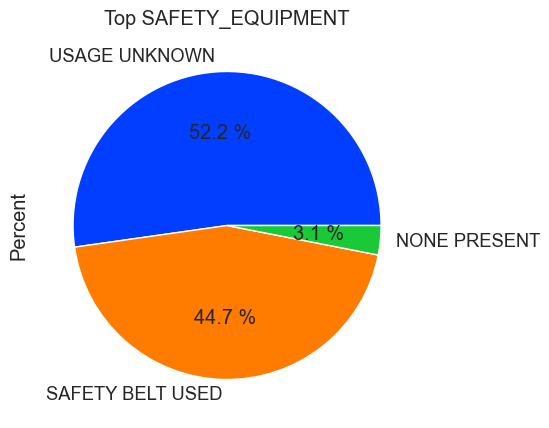

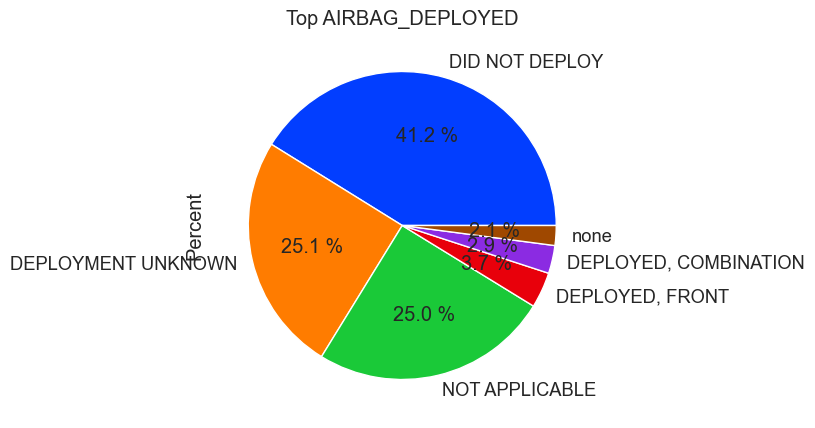

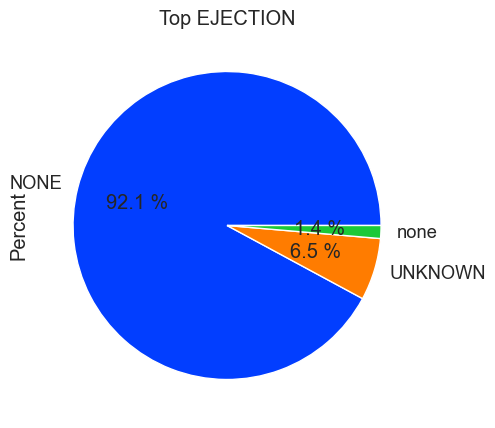

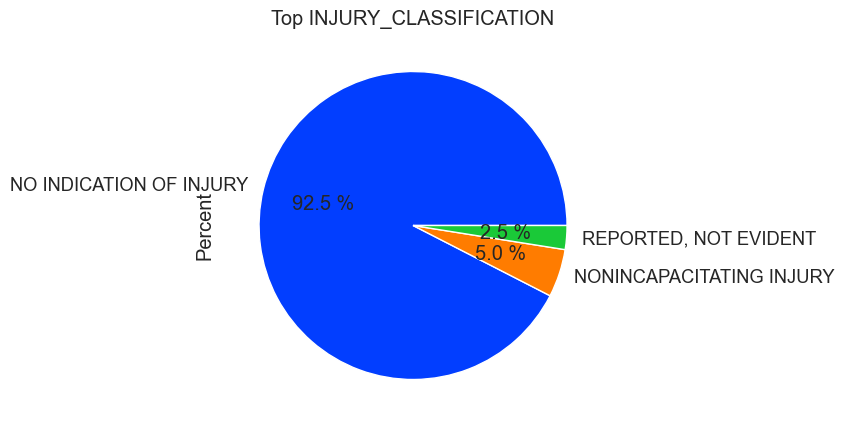

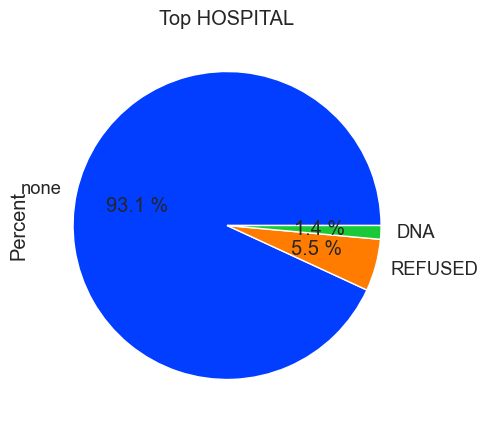

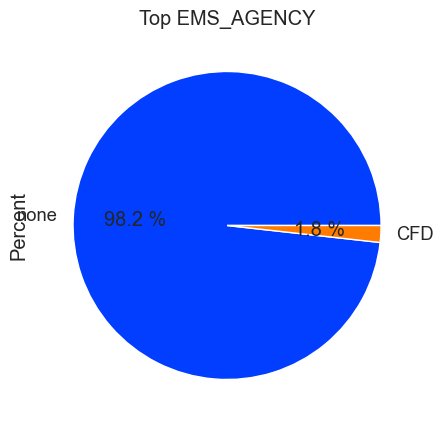

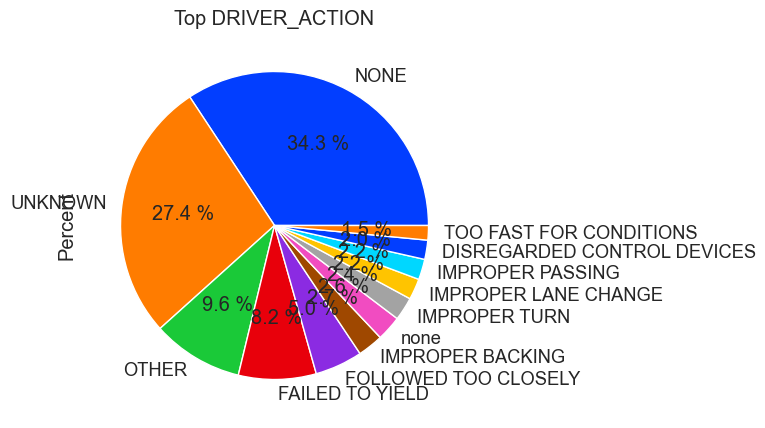

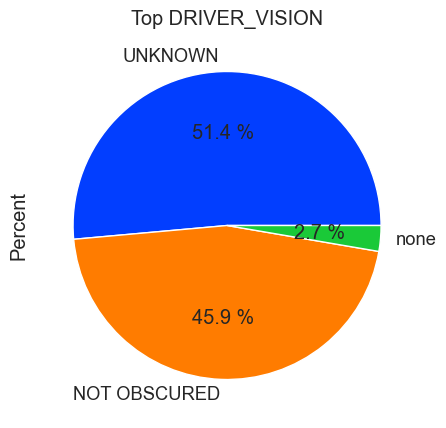

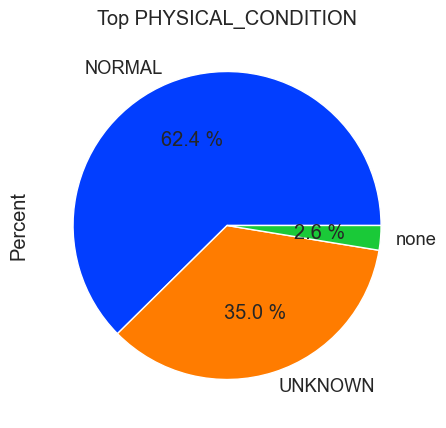

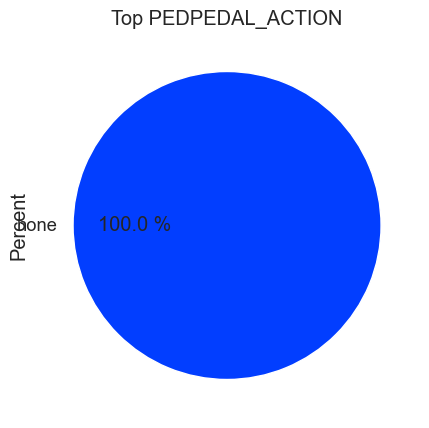

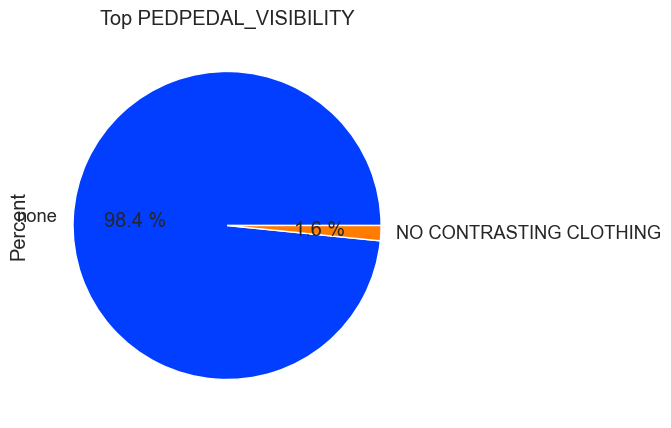

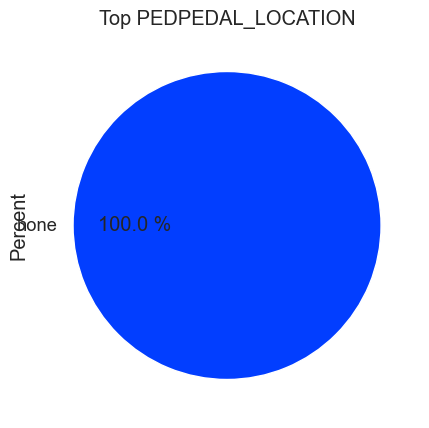

In [137]:
# This creates the pie charts for each categorical attribute in cat above
pies=[]
ylabels=[]

for j in range(len(cat)):
    pies.clear()
    ylabels.clear()
    s=dff[cat[j]]
    y=s.value_counts(normalize=True)

    for i in range(len(s.value_counts(normalize=True))):
        if s.value_counts(normalize=True)[i]>.01:
           pies.append(s.value_counts(normalize=True)[i])
           ylabels.append(y.index.values[i])

    
    s1 = pd.DataFrame({'Categories': (ylabels),
                       'Percent': pies})
    s1.set_index('Categories', inplace=True)
    #print(s)
    plot=s1.plot.pie(y='Percent', figsize=(5,5), legend=False, autopct='%.1f %%', title=('Top ' +  cat[j]))
    plt.show()
    plt.close()


### Remove very small quantities categories
We convert any category that has less than 1% in size to to new category named "Other"

In [ ]:
# Rename small percentage attribute name to Other/Remainder

remove_ylabels=[]
m=0
for m in range(len(cat)):
    s=dff[cat[m]]

    y=s.value_counts(normalize=True)
    remove_ylabels.clear()
    i=0
    j=0
    k=0
    for i in range(len(s.value_counts(normalize=True))):
        if s.value_counts(normalize=True)[i]>.01:
            s.value_counts(normalize=True)[i]
        else:
            remove_ylabels.append(y.index.values[i])

    for j in range(len(remove_ylabels)):

        for k in range(len(s)):
                if s[k]==remove_ylabels[j]:
                    dff.at[k,cat[m]]='Remainder'
                    #s[k]=='Other'
         


### Save new file since this trimming of the data above takes over 3 hours to perform

In [35]:
 dff.to_csv('TandPremainder2.csv')

NameError: name 'dff' is not defined

In [3]:
# After removing small categories
dff_cat = pd.read_csv('TandPremainder2.csv')
dff_cat[1:5]
pd.DataFrame(dff_cat)

,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE
0,0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
1,1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
2,2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,...,none,none,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938
3,3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,none,none,OTHER,UNKNOWN,Remainder,none,none,none,TEST NOT OFFERED,0.179938
4,4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,none,none,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,none,none,none,none,none,none,none,none,none,0.179938
248619,248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,none,none,none,none,none,none,none,none,none,0.179938
248620,248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,REFUSED,none,none,none,none,none,none,none,none,0.179938
248621,248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,REFUSED,none,none,none,none,none,none,none,none,0.179938


### After opening new file we ensure the data looks correct by reexaming some of the pie charts as previous

In [61]:
dffinal=dff_cat

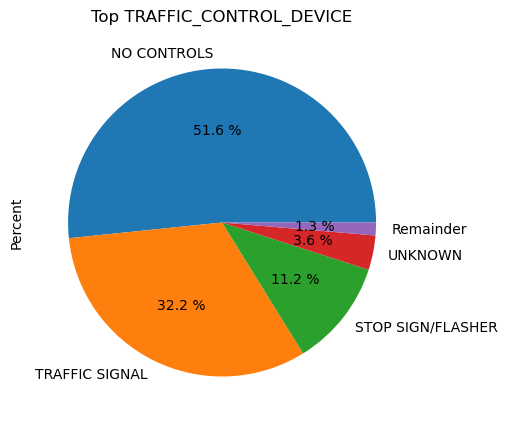

In [60]:
a=('TRAFFIC_CONTROL_DEVICE')
s=dff_cat[a]

y=s.value_counts(normalize=True)
pies=[]
ylabels=[]
for i in range(len(s.value_counts(normalize=True))):
    if s.value_counts(normalize=True)[i]>.0005:
       pies.append(s.value_counts(normalize=True)[i])
       ylabels.append(y.index.values[i])
       
    
s1 = pd.DataFrame({'Categories': (ylabels),
                   'Percent': pies})
s1.set_index('Categories', inplace=True)
#print(s)
plot = s1.plot.pie(y='Percent', figsize=(5,5), legend=False, autopct='%.1f %%', title=('Top ' +  a))

### Start to Hot encode and scale attributes

In [9]:
dff_cat.columns

Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'PERSON_ID', 'PERSON_TYPE',
       'CRASH_RECORD_ID (right)', 'RD_NO (right)', 'VEHICLE_ID',
       'CRAS

In [10]:
d=['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY',  'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'PERSON_ID', 'PERSON_TYPE',
       'CRASH_RECORD_ID (right)', 'RD_NO (right)', 'VEHICLE_ID',
       'CRASH_DATE (right)', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
       'BAC_RESULT']
df1 = df.drop(columns=d)
df1

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,BAC_RESULT VALUE
0,35,0,0,0,0,0,3,0,28.000000,0.179938
1,35,0,0,0,0,0,3,0,27.000000,0.179938
2,30,1,0,0,1,0,3,0,39.270758,0.179938
3,30,0,0,0,0,0,1,0,29.000000,0.179938
4,30,0,0,0,0,0,1,0,58.000000,0.179938
...,...,...,...,...,...,...,...,...,...,...
248618,30,0,0,0,0,0,7,0,17.000000,0.179938
248619,30,0,0,0,0,0,7,0,8.000000,0.179938
248620,30,0,0,0,0,0,3,0,20.000000,0.179938
248621,30,0,0,0,0,0,3,0,30.000000,0.179938


### df1 represents the continuous variables for scaling

In [11]:
cols=df1.columns
cols

Index(['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'AGE', 'BAC_RESULT VALUE'],
      dtype='object')

### Normalize countinuous variables

In [12]:
#Normalize countinous variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)


MinMaxScaler()

In [13]:
# Result of scaling nmerical columns
df1= pd.DataFrame(scaler.fit_transform(df1), columns=cols)
df1

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,BAC_RESULT VALUE
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.271845,0.179938
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,0.179938
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,0.179938
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,0.179938
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,0.179938
...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.165049,0.179938
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.077670,0.179938
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.194175,0.179938
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.291262,0.179938


### hot_cat are the categorical columns to be used for hot encoding and then merged back with numerical columns

In [14]:
hot_cat=(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE','PRIM_CONTRIBUTORY_CAUSE', 'SEX', 
       'STREET_DIRECTION',  
       'MOST_SEVERE_INJURY'])
len(hot_cat)

19

In [15]:
# Hot Encoding columns

i=0
for i in range(len(hot_cat)):
    new_df = pd.DataFrame(dff_cat, columns=[hot_cat[i]])
    # generate binary values using get_dummies
    dum_df = pd.get_dummies(new_df, columns=[hot_cat[i]], prefix=[hot_cat[i] + ' Type_is'] )
    #merge with main df bridge_df on key values
    dff_cat=dff_cat.join(dum_df)

dff_cat


,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
0,0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0,1,0,0,0,0,1,0,0,0
1,1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0,1,0,0,0,0,1,0,0,0
2,2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,...,0,0,0,0,1,0,0,1,0,0
3,3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0,0,0,0,1,0,1,0,0,0
4,4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,0,0,0,1,0,0,1,0,0,0
248619,248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,0,0,0,1,0,0,1,0,0,0
248620,248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,0,0,0,0,1,0,1,0,0,0
248621,248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0,0,0,1,0,0,1,0,0,0


### Saving Hot Encode section

In [16]:
dff_cat.to_csv('dff_hot_encoding.csv')


In [17]:
# create section of hot endcoding to be merged with numerical
dff_hot=dff_cat.iloc[:,69:171]
dff_hot

,TRAFFIC_CONTROL_DEVICE Type_is_NO CONTROLS,TRAFFIC_CONTROL_DEVICE Type_is_Remainder,TRAFFIC_CONTROL_DEVICE Type_is_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE Type_is_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE Type_is_UNKNOWN,DEVICE_CONDITION Type_is_FUNCTIONING PROPERLY,DEVICE_CONDITION Type_is_NO CONTROLS,DEVICE_CONDITION Type_is_Remainder,DEVICE_CONDITION Type_is_UNKNOWN,WEATHER_CONDITION Type_is_CLEAR,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
248619,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
248620,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
248621,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### Merging of numerical and Categorical data

In [18]:
#Join Scaled Numerical and Hot encoder
dff_final=df1.join(dff_hot)
dff_final

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,BAC_RESULT VALUE,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.271845,0.179938,...,0,1,0,0,0,0,1,0,0,0
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,0.179938,...,0,1,0,0,0,0,1,0,0,0
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,0.179938,...,0,0,0,0,1,0,0,1,0,0
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,0.179938,...,0,0,0,0,1,0,1,0,0,0
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,0.179938,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.165049,0.179938,...,0,0,0,1,0,0,1,0,0,0
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.077670,0.179938,...,0,0,0,1,0,0,1,0,0,0
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.194175,0.179938,...,0,0,0,0,1,0,1,0,0,0
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.291262,0.179938,...,0,0,0,1,0,0,1,0,0,0


### Save File for merged hot encoding and numerical scaling

In [19]:
dff_final.to_csv('dff_final2.csv')

### Create a version without hot encoding (needed for Kmode and Kprototype)

In [56]:
#merge ithout hot encoding
for i in range (len(hot_cat)):
    if i==0:
        h=dff_cat[hot_cat[i]]
    else:
        h=pd.concat([dff_cat[hot_cat[i]],h], axis=1)  
dff_final=df1.join(h)
dff_final[0:5]

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,BAC_RESULT VALUE,...,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.271845,0.179938,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,0.179938,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,0.179938,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,0.179938,...,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,0.179938,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN


In [57]:
# ave non hot encoding
dff_final.to_csv('dff_final.csv')

In [58]:
dff_final.isnull().any()

POSTED_SPEED_LIMIT               False
INJURIES_TOTAL                   False
INJURIES_FATAL                   False
INJURIES_INCAPACITATING          False
INJURIES_NON_INCAPACITATING      False
INJURIES_REPORTED_NOT_EVIDENT    False
INJURIES_NO_INDICATION           False
INJURIES_UNKNOWN                 False
AGE                              False
BAC_RESULT VALUE                 False
MOST_SEVERE_INJURY               False
SEX                              False
STREET_DIRECTION                 False
PRIM_CONTRIBUTORY_CAUSE          False
DAMAGE                           False
HIT_AND_RUN_I                    False
NOT_RIGHT_OF_WAY_I               False
INTERSECTION_RELATED_I           False
CRASH_TYPE                       False
REPORT_TYPE                      False
ROAD_DEFECT                      False
ROADWAY_SURFACE_COND             False
ALIGNMENT                        False
TRAFFICWAY_TYPE                  False
FIRST_CRASH_TYPE                 False
LIGHTING_CONDITION       

### Ready for Clustering Method Evaluation

In [78]:
dff_final2 = pd.read_csv('dff_final2.csv')
dff_final2[1:5]


,Unnamed: 0,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
1,1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,...,0,1,0,0,0,0,1,0,0,0
2,2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,...,0,0,0,0,1,0,0,1,0,0
3,3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,...,0,0,0,0,1,0,1,0,0,0
4,4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,...,0,1,0,0,0,0,1,0,0,0


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

#### Kmodes Modeling (use dff_hot version)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3211879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3211879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3211879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3211879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3211879.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 48162, cost: 2826995.0
Run 1, iteration: 2/100, moves: 11980, cost: 2815804.0
Run 1, iteration: 3/100, moves: 1935, cost: 2815804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

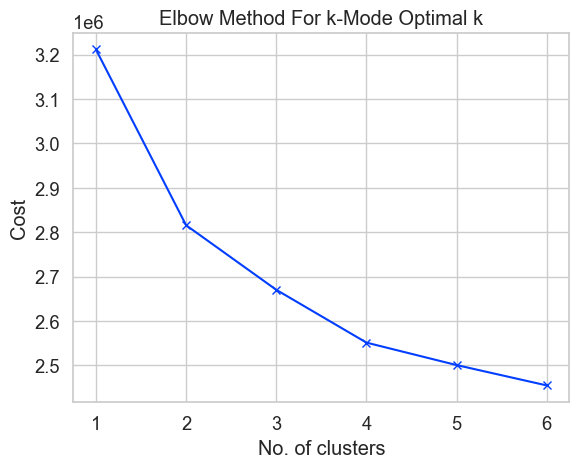

In [138]:
# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(dff_hot)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For k-Mode Optimal k')
plt.show()

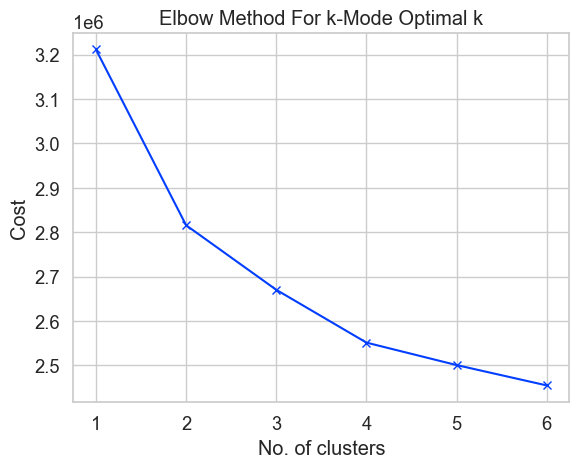

In [139]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For k-Mode Optimal k')
plt.show()

In [140]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
#data = np.random.choice(20, (100, 10))

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(dff_final)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 71017, cost: 2150927.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 85098, cost: 2150504.0
Run 2, iteration: 2/100, moves: 19378, cost: 2147931.0
Run 2, iteration: 3/100, moves: 6879, cost: 2128697.0
Run 2, iteration: 4/100, moves: 13464, cost: 2122184.0
Run 2, iteration: 5/100, moves: 21366, cost: 2094415.0
Run 2, iteration: 6/100, moves: 9526, cost: 2094415.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 87206, cost: 2160012.0
Run 3, iteration: 2/100, moves: 9648, cost: 2160012.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 68395, cost: 2152881.0
Run 4, iteration: 2/100, moves: 7697, cost: 2152881.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

In [152]:
clusters

array([3, 3, 1, ..., 0, 2, 0], dtype=uint16)

In [ ]:
from collections import Counter
Counter(clusters.labels_)

In [158]:
dff_final['Clusters']=clusters
dff_final

#Save new cluster to computer for k-Mean
dff_final.to_csv('dff_final.csv')


In [105]:
dff_final[0:5]

,Unnamed: 0,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,...,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE
0,0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.271845,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
1,1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
2,2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS
3,3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,...,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS
4,4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN


KeyError: "['A'] not found in axis"

In [108]:
# Define Category indee
#dff_final2
kcol=list(range(11,30))
#kcol

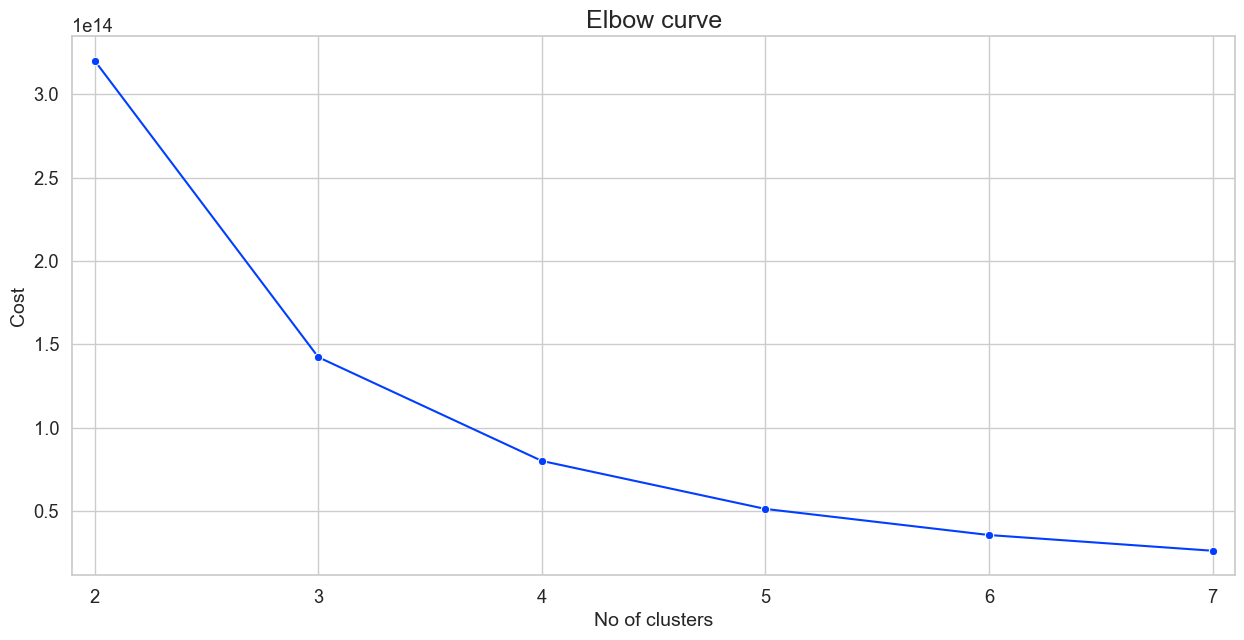

In [109]:
# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
        no_of_clusters = list(range(start, end+1))
        cost_values = []

        for k in no_of_clusters:
                test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
                test_model.fit_predict(data, categorical=kcol)
                cost_values.append(test_model.cost_)

        sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

        plt.figure(figsize=(15, 7))
        ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
        ax.set_title('Elbow curve', fontsize=18)
        ax.set_xlabel('No of clusters', fontsize=14)
        ax.set_ylabel('Cost', fontsize=14)
        ax.set(xlim=(start-0.1, end+0.1))
        plt.plot();
    
# Plotting elbow curve for k=2 to k=10
plot_elbow_curve(2,7,dff_final)

In [59]:
kp_4 = KPrototypes(n_clusters=4, init='Huang', random_state=42, n_jobs=-1)
kp_4.fit_predict(dff_final, categorical=kcol)
print(kp_4.cost_)#new column for cluster labels associated with each subject
#dffX['Cluster'] = kp_4.labels_

33201.02676896408


In [60]:
dff_final['Clusters']=kp_4.labels_
dff_final

#Save new cluster to computer for k-Mean
#dff_final.to_csv('dff_final.csv')


,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,BAC_RESULT VALUE,...,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,Clusters
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.271845,0.179938,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,2
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,0.179938,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,2
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,0.179938,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS,3
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,0.179938,...,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS,3
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,0.179938,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.165049,0.179938,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,2
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.077670,0.179938,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,2
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.194175,0.179938,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,2
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.291262,0.179938,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,ANGLE,DAYLIGHT,RAIN,NO CONTROLS,NO CONTROLS,3


In [61]:
#Save new cluster to computer for k-Prototype
dff_final.to_csv('dff_final_KP.csv')

In [ ]:
### DBCAN


In [79]:
d=dff_final2.iloc[0:100000,1:95]

In [339]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors =10).fit(d)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(d)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

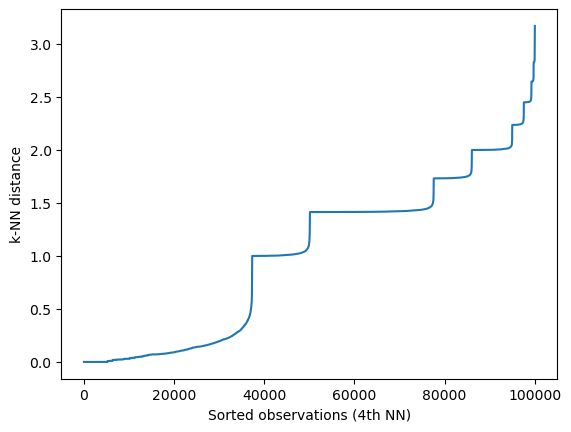

In [340]:
# Find Epilon or noise level range to consider
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


In [341]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

3.1622776601683795


In [90]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.95, min_samples=112).fit(d)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 27073


In [40]:
from collections import Counter
Counter(labels)

Counter({0: 46171, -1: 53269, 1: 356, 2: 204})

In [44]:
pred=db.fit_predict(d) 

In [65]:
a=dff_final.iloc[0:100000,1:95]

a['Cluster']=pred
a   #d_dbsn

,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,BAC_RESULT VALUE,MOST_SEVERE_INJURY,...,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,Cluster
0,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.271845,0.179938,NO INDICATION OF INJURY,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,0
1,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,0.179938,NO INDICATION OF INJURY,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,0
2,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,0.179938,NONINCAPACITATING INJURY,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS,-1
3,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,0.179938,NO INDICATION OF INJURY,...,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS,-1
4,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,0.179938,NO INDICATION OF INJURY,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0.0,0.0,0.000000,0.0,0.088889,0.0,0.388350,0.179938,NO INDICATION OF INJURY,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN BARRIER,REAR END,DAYLIGHT,CLEAR,NO CONTROLS,NO CONTROLS,0
99996,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.381269,0.179938,NO INDICATION OF INJURY,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,NOT DIVIDED,SIDESWIPE OPPOSITE DIRECTION,DAYLIGHT,CLEAR,NO CONTROLS,NO CONTROLS,0
99997,0.000000,0.0,0.0,0.000000,0.0,0.044444,0.0,0.242718,0.179938,NO INDICATION OF INJURY,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,FOUR WAY,SIDESWIPE SAME DIRECTION,DAWN,RAIN,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,-1
99998,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.524272,0.179938,NO INDICATION OF INJURY,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,NOT DIVIDED,SIDESWIPE OPPOSITE DIRECTION,DAYLIGHT,CLEAR,NO CONTROLS,NO CONTROLS,0


In [111]:
#Save new cluster to computer for k-Mean
a.to_csv('df_cluster_dbsn.csv')


NameError: name 'a' is not defined

In [118]:
dff_final

,Unnamed: 0,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,AGE,...,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE
0,0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.271845,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
1,1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.262136,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
2,2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.381269,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS
3,3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.281553,...,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS
4,4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.563107,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.165049,...,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248619,248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.077670,...,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248620,248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.194175,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248621,248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.291262,...,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,ANGLE,DAYLIGHT,RAIN,NO CONTROLS,NO CONTROLS


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data =dff_final, x = "AGE", y = "INJURIES_TOTAL", hue ="Clusters" , legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()


ValueError: Could not interpret value `Clusters` for parameter `hue`


### Kmeans exploring clusters 1-11

In [142]:

#Find optimum number of cluster range 1-10
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(dff_final2)
    sse.append(km.inertia_)


ValueError: could not convert string to float: 'bca52a367d2f053f3a338c9199261b11b245fb00db3b9ece86b6af6cf7a955c835dc1b8d69f640c093b81a3ee5834826c9fac04c5fdfabc623d010e2cb761425'

### Create an Elbow Chart to determine best cluster # choice

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Inertia - Sum Squared Error", 
      title ='k-Means Elbow Method')
 
plt.show()


### From Chart above we pick 6 clusters and below get there cluster centers with 6 clusters

In [104]:

kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans.fit(dff_final2)


C:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [105]:
kmeans.cluster_centers_[0]

array([ 3.11605000e+04,  4.11253077e-01,  1.09087825e-02,  4.59976680e-04,
        3.96061316e-03,  7.00943656e-03,  8.84519110e-03,  4.74446334e-02,
        0.00000000e+00,  3.82382089e-01,  1.79941919e-01,  2.66769359e+00,
        5.29684542e-01,  1.20182279e-02,  1.09945124e-01,  3.17817143e-01,
        3.05349636e-02,  3.87551747e-01,  5.41429993e-01,  1.47459966e-02,
        5.62722634e-02,  7.67674337e-01,  3.00375469e-02,  4.49119091e-02,
        1.24033247e-02,  1.03205930e-01,  4.17669523e-02,  4.32592022e-02,
        2.36304997e-01,  1.59173326e-02,  6.43801547e-01,  2.93315362e-02,
        3.13853856e-02,  1.31574725e-01,  3.43217483e-02,  1.19379994e-02,
        1.63264979e-01,  1.03976124e-02,  2.20146979e-02,  2.50874491e-01,
        1.81476846e-02,  2.30416225e-02,  1.87895125e-02,  1.55611181e-01,
        1.60023748e-01,  1.42806714e-02,  1.60601393e-01,  5.43628253e-02,
        1.01649498e-01,  4.25130772e-01,  1.10314175e-01,  2.45980553e-02,
        5.30149867e-02,  

In [106]:
# predict the cluster on the dataset
pred = kmeans.fit_predict(dff_final2)
len(pred==1)


C:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


248623

In [ ]:
add sillhoute view and PCA dimenion

#### we add Cluster to the original file we started with, this will be helpful to identify how the kmeans seperated each attribute

In [107]:
df['Cluster'] = pred
dff_final2['Cluster'] = pred
pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
df

In [ ]:
#Gaussian miture
from sklearn.mixture import GaussianMixture

# initialize the data set we'll work with
#training_data, _ = make_classification(
#    n_samples=1000,
#    n_features=6,
#    n_informative=2,
#    n_redundant=0,
#    n_clusters_per_class=1,
#    random_state=4
#)

# define the model
gaussian_model = GaussianMixture(n_components=6)

# train the model
gaussian_model.fit(dff_final)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(dff_final)

# get all of the unique clusters
gaussian_clusters = unique(gaussian_result)



In [18]:
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

def elbow_report(X):
    aic_k=[]
    bic_k=[]
    n_clusters = range(2,8)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        aic_k.append(gmm.aic(X))
        bic_k.append(gmm.bic(X))
    plt.plot(n_clusters,aic_k,'bx-', label='AIC')
    plt.plot(n_clusters,bic_k,'r-', label='BIC')
    plt.xlabel('Number of Clusters') 
    plt.ylabel('AIC and BIC') 
    plt.title('GMM Clustering for n_cluster=2 to 8')
    plt.legend()
    plt.show()

In [19]:
elbow_report(dff_final2)

NameError: name 'plt' is not defined

In [62]:
gmm = GaussianMixture(n_components=6)
gmm_pred=gmm.fit(dff_final2)

In [63]:
gmm_pred
gmm_pred = gmm_pred.fit_predict(dff_final2)

In [64]:
gmm_pred

array([5, 5, 4, ..., 5, 0, 5], dtype=int64)

In [108]:
dffinal['Cluster'] = pred
dff_cat['Cluster'] = pred
dff_cat

,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder,Cluster
0,0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,1,0,0,0,0,1,0,0,0,0
1,1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,1,0,0,0,0,1,0,0,0,0
2,2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,...,0,0,0,1,0,0,1,0,0,0
3,3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0,0,0,1,0,1,0,0,0,0
4,4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,0,0,1,0,0,1,0,0,0,1
248619,248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,0,0,1,0,0,1,0,0,0,1
248620,248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,0,0,0,1,0,1,0,0,0,1
248621,248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0,0,1,0,0,1,0,0,0,1


### Save new file df with cluster assignment

In [109]:
#Save new cluster to computer for k-Mean
dffinal.to_csv('df_cluster.csv')


In [67]:
#Save new cluster to computer for gmm
dffinal.to_csv('df_cluster_gmm.csv')

### Since datasize if huge we need to use pyspark to do some queries to assess the data using groupby for example

In [129]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create SparkSession 
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("SparkByExamples.com") \
      .getOrCreate()

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [62]:
# Read Crashes CSV file into table
dfT = spark.read.option("header",True) \
          .csv("dff_final_KP.csv")
dfT.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- POSTED_SPEED_LIMIT: string (nullable = true)
 |-- INJURIES_TOTAL: string (nullable = true)
 |-- INJURIES_FATAL: string (nullable = true)
 |-- INJURIES_INCAPACITATING: string (nullable = true)
 |-- INJURIES_NON_INCAPACITATING: string (nullable = true)
 |-- INJURIES_REPORTED_NOT_EVIDENT: string (nullable = true)
 |-- INJURIES_NO_INDICATION: string (nullable = true)
 |-- INJURIES_UNKNOWN: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- BAC_RESULT VALUE: string (nullable = true)
 |-- MOST_SEVERE_INJURY: string (nullable = true)
 |-- SEX: string (nullable = true)
 |-- STREET_DIRECTION: string (nullable = true)
 |-- PRIM_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- HIT_AND_RUN_I: string (nullable = true)
 |-- NOT_RIGHT_OF_WAY_I: string (nullable = true)
 |-- INTERSECTION_RELATED_I: string (nullable = true)
 |-- CRASH_TYPE: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true

In [63]:
# Read CSV file into table
spark.read.option("header",True) \
          .csv("dff_final_KP.csv") \
          .createOrReplaceTempView("dfc")

In [64]:
dfT.columns

['_c0',
 'POSTED_SPEED_LIMIT',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'AGE',
 'BAC_RESULT VALUE',
 'MOST_SEVERE_INJURY',
 'SEX',
 'STREET_DIRECTION',
 'PRIM_CONTRIBUTORY_CAUSE',
 'DAMAGE',
 'HIT_AND_RUN_I',
 'NOT_RIGHT_OF_WAY_I',
 'INTERSECTION_RELATED_I',
 'CRASH_TYPE',
 'REPORT_TYPE',
 'ROAD_DEFECT',
 'ROADWAY_SURFACE_COND',
 'ALIGNMENT',
 'TRAFFICWAY_TYPE',
 'FIRST_CRASH_TYPE',
 'LIGHTING_CONDITION',
 'WEATHER_CONDITION',
 'DEVICE_CONDITION',
 'TRAFFIC_CONTROL_DEVICE',
 'Clusters']

### Chi Testing to see if attribute are meaningful, only 1-2 are not significant

In [65]:
#Chi testing
from scipy.stats import chi2_contingency
test_stats = []
p_vals = []
dof_vals = []
data=dfT.toPandas()

for col in dfT.columns[1:]:
    chi2_results = chi2_contingency(observed=pd.crosstab(data['Clusters'], 
                                                         data[col]))
    test_stats.append(chi2_results[0])
    p_vals.append(chi2_results[1])
    dof_vals.append(chi2_results[2])
    
    
chi_test_df = pd.DataFrame(list(zip(data.columns[1:], 
                                    test_stats,
                                    p_vals,
                                    dof_vals)), columns=['variable', 'chi2_test_stat', 'p_value', 'dof'])

In [66]:
chi_test_df.sort_values(by=['p_value'], ascending=False)


,variable,chi2_test_stat,p_value,dof
7,INJURIES_UNKNOWN,0.000000,1.000000e+00,0
9,BAC_RESULT VALUE,169.062575,3.732329e-03,123
2,INJURIES_FATAL,103.675130,2.835177e-18,9
22,ALIGNMENT,236.814194,2.688511e-48,6
20,ROAD_DEFECT,1007.860299,1.783820e-214,6
0,POSTED_SPEED_LIMIT,9958.091715,0.000000e+00,93
17,INTERSECTION_RELATED_I,97891.928205,0.000000e+00,6
28,TRAFFIC_CONTROL_DEVICE,82014.733105,0.000000e+00,12
27,DEVICE_CONDITION,82190.508989,0.000000e+00,9
26,WEATHER_CONDITION,4557.224541,0.000000e+00,15


In [67]:
hot_cat=(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE','PRIM_CONTRIBUTORY_CAUSE',  
       'STREET_DIRECTION', 'SEX', 
       'MOST_SEVERE_INJURY'])


### Example of TrafficWay Type by cluster by percent of total population

In [68]:
# SQL Select query
# import sum, min,avg,count,mean and max functions 
from pyspark.sql.functions import sum, max, min, avg, count, mean
from pyspark.sql.functions import sum, col, desc
from pyspark.sql.functions import asc
import pandas as pd 
tot =250000
import pyspark.sql.functions as F
from pyspark.sql.types import *
l=[]
l.clear()
i=0
for i in range(len(hot_cat)):
    if i==0:
        
        d=dfT.groupBy("Clusters",hot_cat[i]).count().withColumn(str('perc_of_count_total'), (F.col('count') / tot) * 100 )
        d=d.sort('Clusters')
        #table.append(d)
        d=d.toPandas()
        d.rename(columns = { hot_cat[i]:'name','count':str('count'),'Clusters': str('Cluster ')}, inplace = True)
        l.append(len(d))
    else:
        e=dfT.groupBy("Clusters",hot_cat[i]).count().withColumn(str('perc_of_count_total'), (F.col('count') / tot) * 100 )
        e=e.sort('Clusters')
        #table.append(d)
        e=e.toPandas()
        e.rename(columns = { hot_cat[i]:'name','count':str('count'),'Clusters': str('Cluster ')}, inplace = True)
        l.append(len(e))
        #d=pd.join(d,e)
        d=pd.concat([d, e])  
d=d.drop(['count'], axis=1)
d


,Cluster,name,perc_of_count_total
0,0,NO CONTROLS,10.1012
1,0,Remainder,0.2744
2,0,TRAFFIC SIGNAL,4.4108
3,0,STOP SIGN/FLASHER,1.7844
4,0,UNKNOWN,0.5348
...,...,...,...
15,3,INCAPACITATING INJURY,0.3420
16,3,NO INDICATION OF INJURY,27.9788
17,3,"REPORTED, NOT EVIDENT",0.8940
18,3,NONINCAPACITATING INJURY,1.6732


In [69]:
l

[20, 16, 24, 24, 48, 44, 12, 20, 12, 12, 8, 12, 12, 12, 12, 60, 18, 16, 20]

In [70]:
#Save new cluster to computer
d.to_csv('d_Pct.csv')
# reopen
d_pct = pd.read_csv('d_Pct.csv')
d_pct[0:3]

,Unnamed: 0,Cluster,name,perc_of_count_total
0,0,0,NO CONTROLS,10.1012
1,1,0,Remainder,0.2744
2,2,0,TRAFFIC SIGNAL,4.4108


In [71]:
#d_pct.columns

In [72]:
# Merge column name to file above
title=[]
title.clear()

for j in range(len(hot_cat)):
    k=0
    for i in range(l[j]):
            t=hot_cat[j]
            title.append(t)
                      
        
t=pd.DataFrame(title, columns=['Cat_name'])  

In [73]:
t

,Cat_name
0,TRAFFIC_CONTROL_DEVICE
1,TRAFFIC_CONTROL_DEVICE
2,TRAFFIC_CONTROL_DEVICE
3,TRAFFIC_CONTROL_DEVICE
4,TRAFFIC_CONTROL_DEVICE
...,...
397,MOST_SEVERE_INJURY
398,MOST_SEVERE_INJURY
399,MOST_SEVERE_INJURY
400,MOST_SEVERE_INJURY


In [74]:
#dff_final['Cluster'] = pred
#d['Cat_Name']=t
p=pd.concat([d_pct,t], axis=1)
p

,Unnamed: 0,Cluster,name,perc_of_count_total,Cat_name
0,0,0,NO CONTROLS,10.1012,TRAFFIC_CONTROL_DEVICE
1,1,0,Remainder,0.2744,TRAFFIC_CONTROL_DEVICE
2,2,0,TRAFFIC SIGNAL,4.4108,TRAFFIC_CONTROL_DEVICE
3,3,0,STOP SIGN/FLASHER,1.7844,TRAFFIC_CONTROL_DEVICE
4,4,0,UNKNOWN,0.5348,TRAFFIC_CONTROL_DEVICE
...,...,...,...,...,...
397,15,3,INCAPACITATING INJURY,0.3420,MOST_SEVERE_INJURY
398,16,3,NO INDICATION OF INJURY,27.9788,MOST_SEVERE_INJURY
399,17,3,"REPORTED, NOT EVIDENT",0.8940,MOST_SEVERE_INJURY
400,18,3,NONINCAPACITATING INJURY,1.6732,MOST_SEVERE_INJURY


### Table above is all categorical vs cluster vs percent of total to help assess how they are different

In [75]:
p.to_csv('Cluster_Percent_Results_KP.csv')

In [300]:
num_col=(['POSTED_SPEED_LIMIT','INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',  
  'AGE'])

### Table below is for the numerical columns by cluster by mean and count

In [301]:
# SQL Select query
# import sum, min,avg,count,mean and max functions 
from pyspark.sql.functions import sum, max, min, avg, count, mean
from pyspark.sql.functions import sum, col, desc
from pyspark.sql.functions import asc
m=[]
i=0
for i in range(len(num_col)):
    if i==0:
        f=dfT.groupBy('Cluster',num_col[i]).agg( \
    count(num_col[i]).alias('count'), \
    mean(num_col[i]).alias(str('mean')))
        f=f.sort('Cluster')
        f=f.toPandas()
        f.rename(columns = {num_col[i]: str('name'), 'count':str('count'),'mean': str('mean')}, inplace = True)
        m.append(len(f))
    else:
        g=dfT.groupBy('Cluster',num_col[i]).agg( \
    count(num_col[i]).alias('count'), \
    mean(num_col[i]).alias(str('mean')))
        g=g.sort('Cluster')
        g=g.toPandas()
        m.append(len(g))
        g.rename(columns = {num_col[i] : str('name'),  'count':str('count'), 'mean': str('mean')}, inplace = True)
        f=pd.concat([f,g],ignore_index=True,axis=0, sort=False)
        
        
        

In [302]:
f.columns

Index(['Cluster', 'name', 'count', 'mean'], dtype='object')

In [303]:
f

,Cluster,name,count,mean
0,0,40,720,40.0
1,0,34,8,34.0
2,0,5,152,5.0
3,0,35,6091,35.0
4,0,20,2691,20.0
...,...,...,...,...
707,3,53.0,427,53.0
708,3,56.0,406,56.0
709,3,81.0,55,81.0
710,3,3.0,15,3.0


In [304]:
m[0]

88

In [309]:
# Merge column name to file above
num=[]
num.clear()
j=0
for j in range(len(num_col)):
    i=0
    for i in range((m[j])):
            p=num_col[j]
            num.append(p)
                      
        
v=pd.DataFrame(num, columns=['Num_name'])  

In [310]:
v

,Num_name
0,POSTED_SPEED_LIMIT
1,POSTED_SPEED_LIMIT
2,POSTED_SPEED_LIMIT
3,POSTED_SPEED_LIMIT
4,POSTED_SPEED_LIMIT
...,...
707,AGE
708,AGE
709,AGE
710,AGE


In [311]:
n=pd.concat([f,v], axis=1)
n

,Cluster,name,count,mean,Num_name
0,0,40,720,40.0,POSTED_SPEED_LIMIT
1,0,34,8,34.0,POSTED_SPEED_LIMIT
2,0,5,152,5.0,POSTED_SPEED_LIMIT
3,0,35,6091,35.0,POSTED_SPEED_LIMIT
4,0,20,2691,20.0,POSTED_SPEED_LIMIT
...,...,...,...,...,...
707,3,53.0,427,53.0,AGE
708,3,56.0,406,56.0,AGE
709,3,81.0,55,81.0,AGE
710,3,3.0,15,3.0,AGE


In [312]:
n.to_csv('Cluster_numerical.csv')

In [ ]:
dc = pd.read_csv('Cluster_Percent_Results.csv')
dc[1:5]
pd.DataFrame(dc)


In [ ]:
dc.columns

In [123]:
dc_cat=(['Cluster 0', 'TRAFFIC_CONTROL_DEVICE',
       'TRAFFIC_CONTROL_DEVICE Count', 'perc_of_count_total0', 'Cluster 1',
       'DEVICE_CONDITION', 'DEVICE_CONDITION Count', 'perc_of_count_total1',
       'Cluster 2', 'WEATHER_CONDITION', 'WEATHER_CONDITION Count',
       'perc_of_count_total2', 'Cluster 3', 'LIGHTING_CONDITION',
       'LIGHTING_CONDITION Count', 'perc_of_count_total3', 'Cluster 4',
       'FIRST_CRASH_TYPE', 'FIRST_CRASH_TYPE Count', 'perc_of_count_total4',
       'Cluster 5', 'TRAFFICWAY_TYPE', 'TRAFFICWAY_TYPE Count',
       'perc_of_count_total5', 'Cluster 6', 'ALIGNMENT', 'ALIGNMENT Count',
       'perc_of_count_total6', 'Cluster 7', 'ROADWAY_SURFACE_COND',
       'ROADWAY_SURFACE_COND Count', 'perc_of_count_total7', 'Cluster 8',
       'ROAD_DEFECT', 'ROAD_DEFECT Count', 'perc_of_count_total8', 'Cluster 9',
       'REPORT_TYPE', 'REPORT_TYPE Count', 'perc_of_count_total9',
       'Cluster 10', 'CRASH_TYPE', 'CRASH_TYPE Count', 'perc_of_count_total10',
       'Cluster 11', 'INTERSECTION_RELATED_I', 'INTERSECTION_RELATED_I Count',
       'perc_of_count_total11', 'Cluster 12', 'NOT_RIGHT_OF_WAY_I',
       'NOT_RIGHT_OF_WAY_I Count', 'perc_of_count_total12', 'Cluster 13',
       'HIT_AND_RUN_I', 'HIT_AND_RUN_I Count', 'perc_of_count_total13',
       'Cluster 14', 'DAMAGE', 'DAMAGE Count', 'perc_of_count_total14',
       'Cluster 15', 'PRIM_CONTRIBUTORY_CAUSE',
       'PRIM_CONTRIBUTORY_CAUSE Count', 'perc_of_count_total15', 'Cluster 16',
       'STREET_DIRECTION', 'STREET_DIRECTION Count', 'perc_of_count_total16',
       'Cluster 17', 'BEAT_OF_OCCURRENCE', 'BEAT_OF_OCCURRENCE Count',
       'perc_of_count_total17', 'Cluster 18', 'MOST_SEVERE_INJURY',
       'MOST_SEVERE_INJURY Count', 'perc_of_count_total18'])

In [124]:
#s=df[a]
pies=[]
ylabels=[]




for j in range(len(dc_cat)):
    pies.clear()
    ylabels.clear()
    s=dc[dc_cat[j]] # Cluter n
    y=s.value_counts(normalize=True)

    for i in range(len(s.value_counts(normalize=True))):
        if s.value_counts(normalize=True)[i]>.01:
           pies.append(s.value_counts(normalize=True)[i])
           ylabels.append(y.index.values[i])

    
    s1 = pd.DataFrame({'Categories': (ylabels),
                       'Percent': pies})
    s1.set_index('Categories', inplace=True)
    #print(s)
    plot=s1.plot.pie(y='Percent', figsize=(5,5), legend=False, autopct='%.1f %%', title=('Top ' +  cat[j]))
    plt.show()
    plt.close()

NameError: name 'dc' is not defined

In [125]:
count=0
if df_final['Cluster'][5]==0:
    count=df_final.iloc[4:5:,1:2].sum()
count
graph

NameError: name 'df_final' is not defined

In [126]:
pip install geopy

In [127]:
# import module 
from geopy.geocoders import Nominatim

# initialize Nominatim API  
#geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="name_of_your_app")

addr = '5 falcon ln nj'
location = geolocator.geocode(addr)
print(location)


5, Falcon Lane, Delanco Township, Burlington County, New Jersey, 08075, United States


In [128]:
# Create occurance by zip
df_C=dfT.toPandas()

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [ ]:
df_C.columns

In [121]:
# import module 
from geopy.geocoders import Nominatim

# initialize Nominatim API  
#geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="name_of_your_app")
#location = geolocator.geocode(address, addressdetails=True)
addr = '5 falcon ln nj'
location = geolocator.geocode(addr,addressdetails=True)
print(location)

5, Falcon Lane, Delanco Township, Burlington County, New Jersey, 08075, United States


In [122]:
# create a tring
from time import sleep
address=[]
address.clear()
cluster=[]
i=0
for i in range(len(df_C['STREET_NO'])):
    A=str(df_C['STREET_NO'][i]) +  ' ' + str(df_C['STREET_NAME'][i])+' Chicago'+' Ill'
    c=df_C['Cluster'][i]
    geolocator = Nominatim(user_agent="name_of_your_app")
    sleep(2.5)
    location = geolocator.geocode(A,addressdetails=True)
    if location==None:
        z=''
    elif location.raw['address']==None:
        
        z=''
    else:
        z=location.raw['address']
        z= z.get('postcode', '')
    address.append(z) 
    cluster.append(c)



NameError: name 'df_C' is not defined

In [ ]:
len(address)


In [ ]:
# create df

data ={'Zip':address,'Cluster_No':cluster }
col=('Zip', 'Cluster_No')
df_O=pd.DataFrame(data, columns=col)
df_O

#Save new cluster to computer
df_O.to_csv('df_O.csv')

In [ ]:
df_O = spark.read.option("header",True) \
          .csv("df_O.csv")
df_O.printSchema()

In [ ]:
c_by_Zip=df_O.groupBy('Cluster_No','Zip').agg( \
    count('Zip').alias("count"), \
    mean('Zip').alias("mean"))
c_by_Zip.show()

In [ ]:
#c_by_Zip=c_by_Zip.dropna(how='all')
c_by_Zip=c_by_Zip.toPandas()
c_by_Zip.mask(c_by_Zip.eq('None')).dropna()
c_by_Zip

In [ ]:
# create Columns for Clusters
C=[]

for i in range(len(gdf['zip'])):
    for j in range(len(c_by_Zip['Zip'])):
        for k in range(6):
            if (gdf['zip'][i])==(c_by_Zip['Zip'][j]) and int(c_by_Zip['Cluster_No'][j])==k:
                C1=c_by_Zip['count'][j]
                C.append([gdf['zip'][i],c_by_Zip['Cluster_No'][j],C1])
       
        

In [ ]:
C1

In [ ]:
# Cluter 1
CL1=[]
CL2=[]
CL3=[]
CL4=[]
CL5=[]
CL6=[]
i=0
for i in range(len(C)):
    if int(C[i][1])==0:
        cl1=C[i]
        CL1.append(cl1)
    elif int(C[i][1])==1:
        cl2=C[i]
        CL2.append(cl2)
    elif int(C[i][1])==2:
        cl3=C[i]
        CL3.append(cl3)
    elif int(C[i][1])==3:
        cl4=C[i]
        CL4.append(cl4)
    elif int(C[i][1])==4:
        cl5=C[i]
        CL5.append(cl5)
    else: 
        int(C[i][1])==5
        cl6=C[i]
        CL6.append(cl6)


In [ ]:
print(len(CL1),len(CL2),len(CL3),len(CL4),len(CL5),len(CL6))
print(CL1)



In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
c_by_Zip['Zip'][0]

In [ ]:
pip install C:\Users\mhodg\GDAL-3.4.3-cp311-cp311-win_amd64.whl

In [ ]:
# use GeoPandas to read in the shape file with the ZIP code boundaries
from osgeo import gdal
import osgeo

gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
gdf = gpd.read_file('~/Shape/geo_export_8ecd3825-0ee9-4a66-bccf-afc6ee2ad645.shp')
#gdf=gpd.read_file('~/Shape/geo_export_6f1a3a1e-ada1-4f2d-a569-19a3f3a53819.shp')
gdf

In [ ]:
# Merge doc
Z1=[]

for i in range(len(gdf['zip'])):
          z=0
          Z1.append([z])

#C1_col=[]
i=0
j=0
for i in range(len(gdf['zip'])):
    for j in range(len(CL1)):
        if int(CL1[j][0])==int(gdf['zip'][i]):
            Z1[i].append([CL1[j][2]])
            Z1[i].remove(Z1[i][0])
            #Z[i].remove(Z[i][0])
            Z1[i]=np.array(Z1[i]).ravel()
         
        

In [ ]:
Z1=np.array(Z1).tolist()
#gdf.join(Z1)

pd.concat(gdf,Z1)

In [ ]:
gdf.plot()

In [ ]:
# use GeoPandas to read in the shape file with the ZIP code boundaries
gdf = gpd.read_file('data/Boundaries_ZIP_Codes/geo_export_94cfa385-03be-4b00-b827-c9e4fdd73a8f.shp')
gdf